In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HeartWatch-Workouts-Detail-20230716-to-20230809.csv')
df = df[df['Workout-Type'] == 'Running']

# Assuming your CSV columns are named 'Date', 'HR', and 'RunID'
grouped_df = df.groupby(['Date'])['bpm'].mean().reset_index()

In [3]:
# Remove anything before the comma in the 'Date' column
grouped_df['Date'] = grouped_df['Date'].str.split(', ').str[1]

In [4]:
fixed_year = 2023  # Replace with the desired year

# Update the 'Date' column with complete datetime values
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'] + ' ' + str(fixed_year), format='%b %d %Y')
# Convert the datetime column to only display the date
grouped_df['Date'] = grouped_df['Date'].dt.date

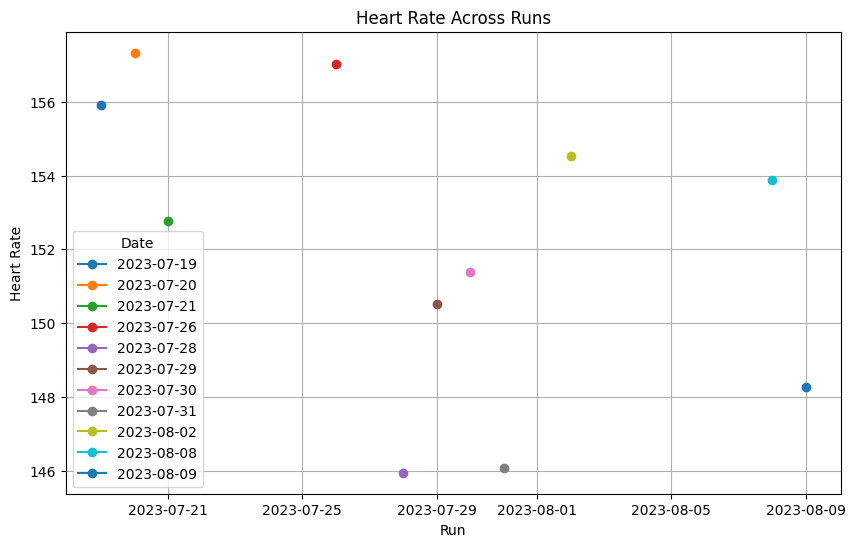

In [5]:
plt.figure(figsize=(10, 6))

for date, data in grouped_df.groupby('Date'):
    plt.plot(data['Date'], data['bpm'],marker= 'o', label=date)

plt.title('Heart Rate Across Runs')
plt.xlabel('Run')
plt.ylabel('Heart Rate')
plt.legend(title='Date')
plt.grid()
plt.show()

In [6]:
# Convert the 'Date' column to datetime if it's not already
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])

# Create a new DataFrame with average HRs per month
avg_hr_per_month_df = grouped_df.groupby(grouped_df['Date'].dt.strftime('%Y-%m')).agg({'bpm': 'mean'}).reset_index()

# Rename the columns for clarity
avg_hr_per_month_df.columns = ['Month', 'Average_HR']

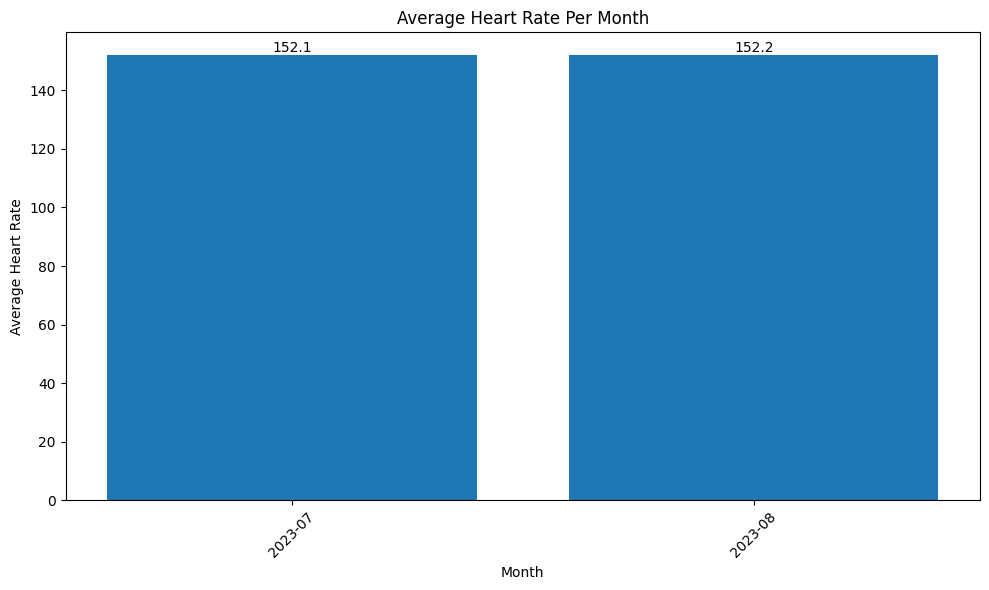

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_hr_per_month_df['Month'], avg_hr_per_month_df['Average_HR'])

plt.title('Average Heart Rate Per Month')
plt.xlabel('Month')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation=45)

# Adding labels with values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

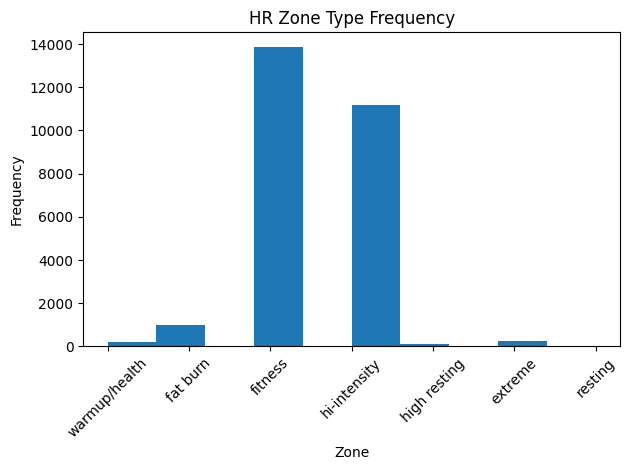

In [19]:
plt.hist(df['Type'])
plt.title('HR Zone Type Frequency')
plt.xlabel('Zone')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print(f"Mean BPM: {round(df['bpm'].mean(),1)}")
print(f"Median BPM: {df['bpm'].median()}")
print(f"Mode BPM: {df['bpm'].mode()[0]}")

Mean BPM: 151.4
Median BPM: 152.0
Mode BPM: 150
